# Pothole Repair Times in NYC

Street Pothole Work Orders – Closed
A pothole is a hole in the street with a circular or ovular shape and a definable bottom. The bottom may be the concrete roadway base and may be partially filled with mud, dirt, or loose gravel. Condition does not look manmade and usually is not sitting in an area of collapse. To be ‘actionable’ the pothole should be at least one foot in diameter and three inches deep.

The Street Pothole Work Orders data consists of closed street potholes inspected and repaired by DOT. The dataset includes a pothole’s location, the date it was reported, and date the report was completed.

http://www.nyc.gov/html/dot/html/about/datafeeds.shtml#construction

Meta data available here:

http://www.nyc.gov/html/dot/downloads/pdf/street-potholes-metadata.pdf

*Note: the data includes only potholes that both **were reported*** and ***have been fixed***. *Thus, repair times will likely skew shorter in this data set than they would in a data set that included potholes that have not yet been fixed. Which, in turn, would skew shorter than a data set that included all potholes and their conditions in real time (say, if one were to use computer vision algorithms to analyze Google Earth or LIDAR technology and detect the existence of potholes regardless of whether or not humans have reported them).*

## Load the data and libraries

In [351]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import os

# Plotting libraries and settings
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.patches as patches
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
mpl.style.use('fivethirtyeight')
%matplotlib inline

In [352]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [353]:
pothole_data = pd.read_csv("potholecoordinates.csv")

In [354]:
pothole_data.head()

,Unnamed: 0,Intersection,RepairTime,RptDate,RptClosed,OFT,DefNum,HouseNum,InitBy,Source,...,County,Zip,Country,Census Year,State FIPS,County FIPS,Place FIPS,Census Tract Code,Census Block Code,Census Block Group
0,0,"BEDFORD AVENUE & BELT PARKWAY, Brooklyn, NY",3046,2004-10-13,2013-02-14,318630377030377030,DB2004287021,NaN,CSC,CTZ,...,Kings County,11216.0,Kings County,2015.0,36.0,36047.0,3610022.0,22100.0,1002.0,1.0
1,1,"13 AVENUE & 38 STREET, Brooklyn, NY",3121,2006-03-26,2014-10-11,306380308480308530,DB2006085009,NaN,CSC,CTZ,...,Kings County,11256.0,Kings County,2015.0,36.0,36047.0,3610022.0,85400.0,1004.0,1.0
2,2,"FULTON STREET & LEWIS AVENUE, Brooklyn, NY",1309,2007-06-15,2011-01-14,342730355530375430,DB2007166005,1688,CSC,CTZ,...,Kings County,11213.0,Kings County,2015.0,36.0,36047.0,3610022.0,27300.0,3002.0,3.0
3,3,"ST FELIX STREET & DEKALB AVENUE, Brooklyn, NY",19,2009-12-18,2010-01-06,380030331530342730,DB2009352004,45,CSC,CTZ,...,Kings County,11217.0,Kings County,2015.0,36.0,36047.0,3610022.0,3300.0,2001.0,2.0
4,4,"AVENUE C & EAST 5 STREET, Brooklyn, NY",7,2009-12-28,2010-01-04,313830335030367730,DB2009362038,514,CSC,CTZ,...,Kings County,11218.0,Kings County,2015.0,36.0,36047.0,3610022.0,48800.0,3001.0,3.0


## Do some preliminary data cleaning

In [355]:
print "Columns = ", str(list(pothole_data.columns))

Columns =  ['Unnamed: 0', 'Intersection', 'RepairTime', 'RptDate', 'RptClosed', 'OFT', 'DefNum', 'HouseNum', 'InitBy', 'Source', 'Shape_leng', 'OBJECTID', 'Latitude', 'Longitude', 'Accuracy Score', 'Accuracy Type', 'Number', 'Street', 'City', 'State', 'County', 'Zip', 'Country', 'Census Year', 'State FIPS', 'County FIPS', 'Place FIPS', 'Census Tract Code', 'Census Block Code', 'Census Block Group']


In [356]:
# Include the following columns from df, which is the data frame we'll use focus on moving forward.
df = pothole_data

In [357]:
# Count records in df by County
df.groupby('County')['Intersection'].count()

County
Bronx County          24133
Erie County             121
Fulton County             6
Kings County          52055
Monroe County             1
Nassau County           249
New York County       27486
Niagara County           10
Onondaga County           4
Queens County         58863
Rensselaer County         1
Richmond County       26842
Washington County         6
Westchester County       14
Name: Intersection, dtype: int64

In [358]:
# Select only NYC counties
df = df.loc[df['County'].isin(['Kings County', 'New York County', 'Queens County',\
                 'Richmond County', 'Bronx County'])].copy()

In [359]:
df.groupby('County')['Intersection'].count()

County
Bronx County       24133
Kings County       52055
New York County    27486
Queens County      58863
Richmond County    26842
Name: Intersection, dtype: int64

In [360]:
# Count the number of null values per columns
df.isnull().sum()

Unnamed: 0                 0
Intersection               0
RepairTime                 0
RptDate                    0
RptClosed                  0
OFT                        0
DefNum                     0
HouseNum               61997
InitBy                     0
Source                     0
Shape_leng                 0
OBJECTID                   0
Latitude                   0
Longitude                  0
Accuracy Score             0
Accuracy Type              0
Number                189319
Street                 51717
City                       0
State                      0
County                     0
Zip                        0
Country                    0
Census Year                0
State FIPS                 0
County FIPS                0
Place FIPS                 0
Census Tract Code          0
Census Block Code          0
Census Block Group         0
dtype: int64

In [361]:
np.unique(df['County'])

array(['Bronx County', 'Kings County', 'New York County', 'Queens County',
       'Richmond County'], dtype=object)

In [362]:
# Update borough names
#borough_names = {'Kings County' : 'Brooklyn', 'New York County' : 'Manhattan', 'Queens County' : 'Queens',\
                 #'Richmond County' : 'Staten Island', 'Bronx County' : 'Bronx'}

borough_names = {'Bronx County': 'Bronx', 'Kings County': 'Brooklyn', 'New York County': 'Manhattan', \
                 'Queens County' : 'Queens','Richmond County': 'Staten Island'}

In [363]:
[borough_names[key] for key in borough_names]

['Bronx', 'Staten Island', 'Manhattan', 'Brooklyn', 'Queens']

In [364]:
boroughs = [borough_names[item] for item in df['County']]
boroughs[:5]

['Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn']

In [365]:
df['Borough'] = boroughs

In [366]:
df.groupby('County')['Intersection'].count()

County
Bronx County       24133
Kings County       52055
New York County    27486
Queens County      58863
Richmond County    26842
Name: Intersection, dtype: int64

In [367]:
df['RptDate'] = pd.to_datetime(df['RptDate'])
df['RptClosed'] = pd.to_datetime(df['RptClosed'])

In [368]:
df['YearRpt'] = [x.year for x in df['RptDate']]
df['MonthRpt'] = [x.month for x in df['RptDate']]

df['YearClosed'] = [x.year for x in df['RptClosed']]
df['MonthClosed'] = [x.month for x in df['RptClosed']]

In [369]:
df.set_index(df.RptDate, inplace=True)

In [370]:
df.head()

,Unnamed: 0,Intersection,RepairTime,RptDate,RptClosed,OFT,DefNum,HouseNum,InitBy,Source,...,County FIPS,Place FIPS,Census Tract Code,Census Block Code,Census Block Group,Borough,YearRpt,MonthRpt,YearClosed,MonthClosed
RptDate,,,,,,,,,,,,,,,,,,,,,
2004-10-13,0,"BEDFORD AVENUE & BELT PARKWAY, Brooklyn, NY",3046,2004-10-13,2013-02-14,318630377030377030,DB2004287021,NaN,CSC,CTZ,...,36047.0,3610022.0,22100.0,1002.0,1.0,Brooklyn,2004,10,2013,2
2006-03-26,1,"13 AVENUE & 38 STREET, Brooklyn, NY",3121,2006-03-26,2014-10-11,306380308480308530,DB2006085009,NaN,CSC,CTZ,...,36047.0,3610022.0,85400.0,1004.0,1.0,Brooklyn,2006,3,2014,10
2007-06-15,2,"FULTON STREET & LEWIS AVENUE, Brooklyn, NY",1309,2007-06-15,2011-01-14,342730355530375430,DB2007166005,1688,CSC,CTZ,...,36047.0,3610022.0,27300.0,3002.0,3.0,Brooklyn,2007,6,2011,1
2009-12-18,3,"ST FELIX STREET & DEKALB AVENUE, Brooklyn, NY",19,2009-12-18,2010-01-06,380030331530342730,DB2009352004,45,CSC,CTZ,...,36047.0,3610022.0,3300.0,2001.0,2.0,Brooklyn,2009,12,2010,1
2009-12-28,4,"AVENUE C & EAST 5 STREET, Brooklyn, NY",7,2009-12-28,2010-01-04,313830335030367730,DB2009362038,514,CSC,CTZ,...,36047.0,3610022.0,48800.0,3001.0,3.0,Brooklyn,2009,12,2010,1


In [371]:
# Cast Borough as categorical
df['Borough'] = df['Borough'].astype('category')

In [372]:
since_2010 = df[df['YearRpt'] >= 2010]
since_2011 = df[df['YearRpt'] >= 2011]
since_2012 = df[df['YearRpt'] >= 2012]
since_2013 = df[df['YearRpt'] >= 2013]
since_2014 = df[df['YearRpt'] >= 2014]
since_2015 = df[df['YearRpt'] >= 2015]
since_2016 = df[df['YearRpt'] >= 2016]

## Exploratory Data Analysis

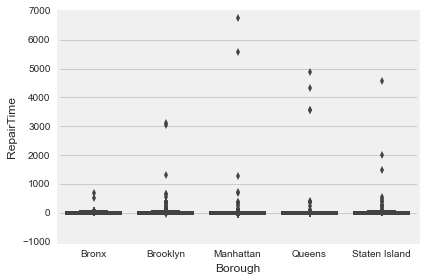

In [373]:
# We can see some major outliers by looking at the boxplot.
# It looks like one pothole in Manhattan took approx. 7,000 days to be fixed! 
sns.boxplot(x=df.Borough, y=df.RepairTime, data=df);

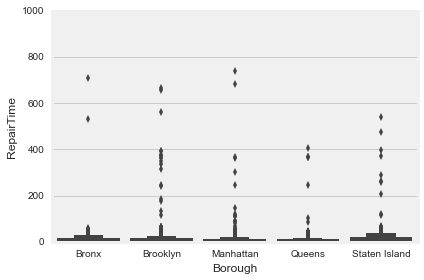

In [374]:
# Zoom in by limiting the y-axis to 1,000 days
sns.boxplot(x=df.Borough, y=df.RepairTime, data=df);
plt.ylim(0,1000);

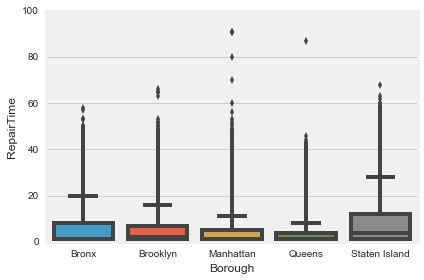

In [375]:
# Zoom in further by limiting the y-axis to 100 days
sns.boxplot(x=df.Borough, y=df.RepairTime, data=df);
plt.ylim(0,100);

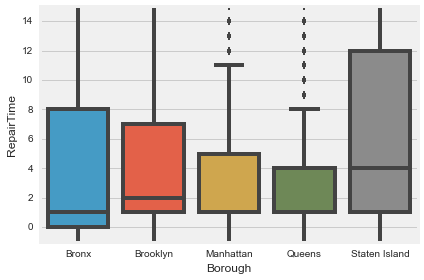

In [376]:
# Zoom in further by limiting the y-axis to 15 days
sns.boxplot(x=df.Borough, y=df.RepairTime, data=df);
plt.ylim(-1,15);

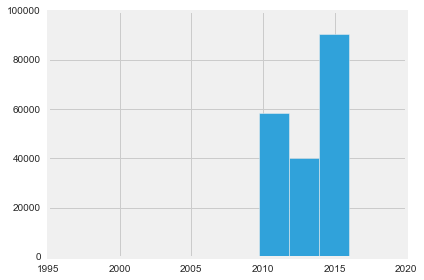

In [377]:
# Histogram plot of reports opened by year over entire df
plt.hist(df.YearRpt);

In [378]:
np.unique(df.YearRpt)

array([1995, 1997, 1998, 2000, 2002, 2004, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016])

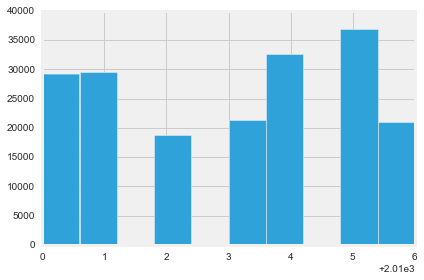

In [379]:
# Histogram plot of reports opened by year over since_2010 df
plt.hist(since_2010.YearRpt);

In [380]:
np.unique(since_2010.YearRpt)

array([2010, 2011, 2012, 2013, 2014, 2015, 2016])

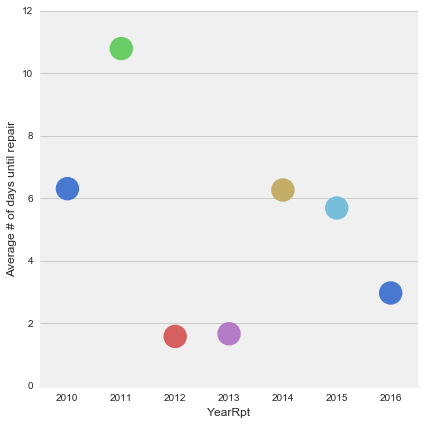

In [381]:
g = sns.factorplot(x="YearRpt", y="RepairTime", data=since_2010,
                   size=6, kind="point", palette="muted")
g.despine(left=True)
g.set_ylabels("Average # of days until repair")

In [382]:
brooklyn = df[df.Borough == 'Brooklyn']
queens = df[df.Borough == 'Queens']
statenIsland = df[df.Borough == 'Staten Island']
manhattan = df[df.Borough == 'Manhattan']
bronx = df[df.Borough == 'Bronx']

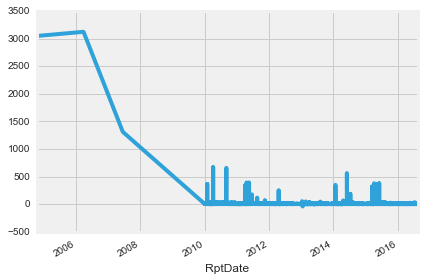

In [383]:
brooklyn.RepairTime.plot()

In [384]:
df.groupby('Borough').RepairTime.count()

Borough
Bronx            24133
Brooklyn         52055
Manhattan        27486
Queens           58863
Staten Island    26842
Name: RepairTime, dtype: int64

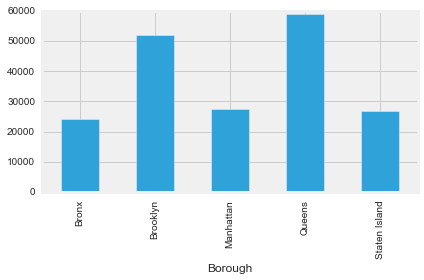

In [385]:
g = df.groupby('Borough').RepairTime.count()
g.plot.bar(stacked=True);

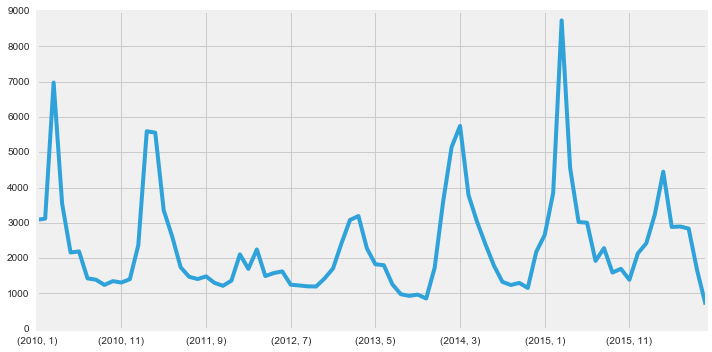

In [386]:
# Plot all pothole reports by month by year
fig, ax = plt.subplots(figsize=(10,5))
d = since_2010.groupby(by=[since_2010.index.year,since_2010.index.month])['Intersection'].count()
g = d.plot()

In [387]:
d.index.levels[0]

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64')

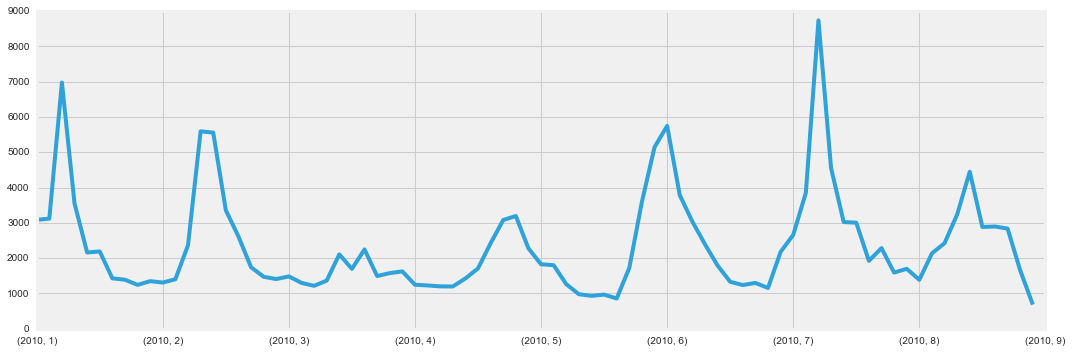

In [388]:
f, ax = plt.subplots(figsize=(15,5))
d = since_2010.groupby(by=[since_2010.index.year,since_2010.index.month])['Intersection'].count()
array = np.array(d)
ax.plot(array)
ticks = d.index.values.tolist()
ax.set_xticklabels(ticks);

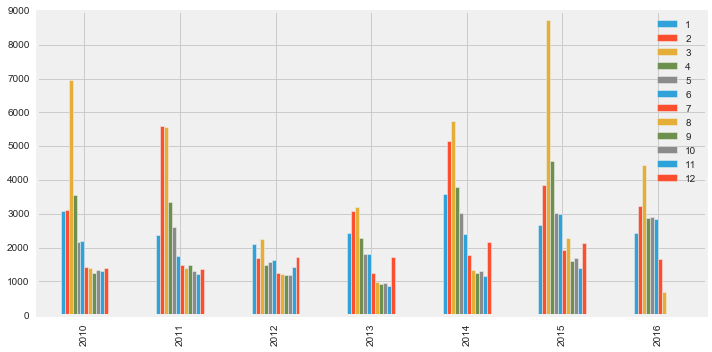

In [389]:
d.unstack().plot(kind='bar', figsize=(10,5));

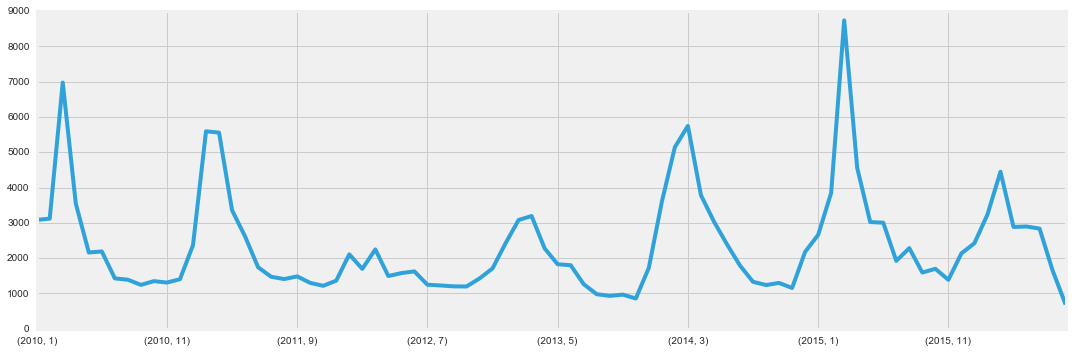

In [390]:
ax = d.plot(figsize=(15,5))

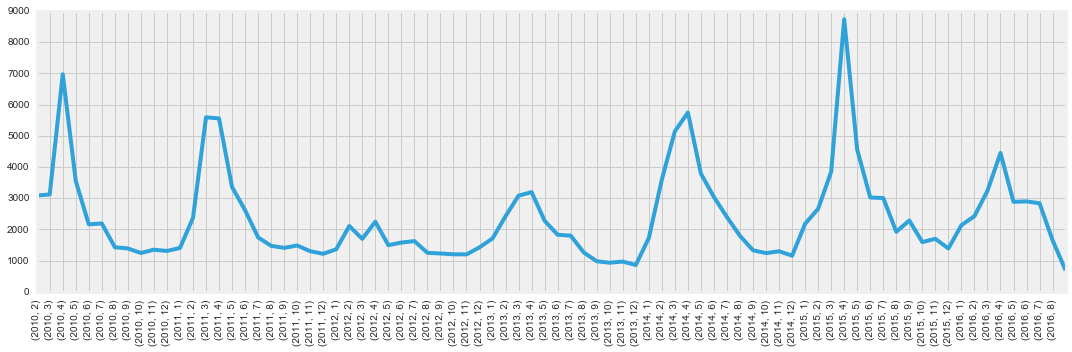

In [391]:
d = since_2010.groupby(by=[since_2010.index.year,since_2010.index.month])['Intersection'].count()

fig, ax = plt.subplots(figsize=(15,5))
ax = d.plot()
ax.xaxis.set_major_locator(MultipleLocator(1))

labs = ax.get_xticks().tolist()
labs = [month for month in d.index]
ax.set_xticklabels(labs, rotation=90);

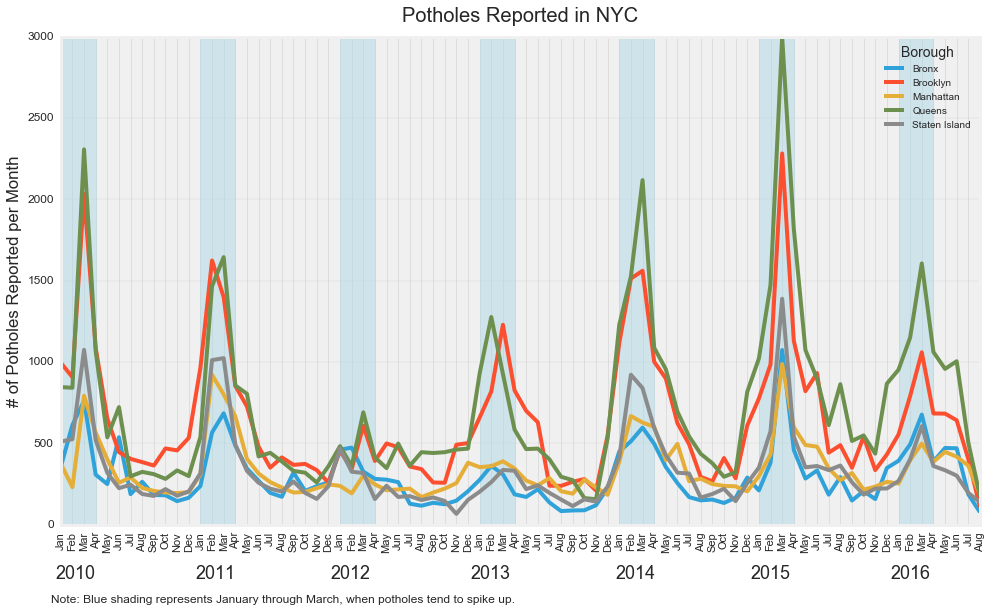

In [405]:
d = since_2010.groupby(by=[since_2010.index.year,since_2010.index.month,since_2010.Borough])['RptDate'].count().unstack()

ax = d.plot(figsize=(14,8))

# Organize some month data to work with x-axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
          'Sep', 'Oct', 'Nov', 'Dec']
month_nums = range(1,13)
month_dict = dict(zip(month_nums, months))
labels_month_nums = [month[1] for month in d.index]
labels_months = [month_dict[i] for i in labels_month_nums]

# Customize x-axis
ax.set_xticks(range(0,len(labels_months)))
ax.set_xticklabels(labels_months, rotation=90)

# Annotations
year_size = 18
plt.annotate('2010', (0,0), (-5, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2011', (0,0), (135, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2012', (0,0), (270, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2013', (0,0), (410, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2014', (0,0), (555, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2015', (0,0), (690, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2016', (0,0), (830, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

note = plt.annotate('Note: Blue shading represents January through March, when potholes tend to spike up.', (0,0), (-10, -70), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=12)



# Add shadings
ax.axvspan(0, 3, alpha=0.5, color='lightblue')
ax.axvspan(12,15, alpha=0.5, color='lightblue')
ax.axvspan(24,27, alpha=0.5, color='lightblue')
ax.axvspan(36,39, alpha=0.5, color='lightblue')
ax.axvspan(48,51, alpha=0.5, color='lightblue')
ax.axvspan(60,63, alpha=0.5, color='lightblue')
ax.axvspan(72,75, alpha=0.5, color='lightblue')

# Customize gridlines
for line in ax.get_xgridlines():
    line.set_linewidth(.5)
for line in ax.get_ygridlines():
    line.set_linewidth(.3)
    
# Update font sizes
mpl.rcParams.update({'font.size': 14})
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=11)

# Title and axis labels
ax.set_ylabel('# of Potholes Reported per Month')
plt.title('Potholes Reported in NYC', y=1.02)

# Save figure
fig = ax.get_figure()
fig.savefig('potholes_reported.svg',bbox_extra_artists=(note,), bbox_inches='tight' );

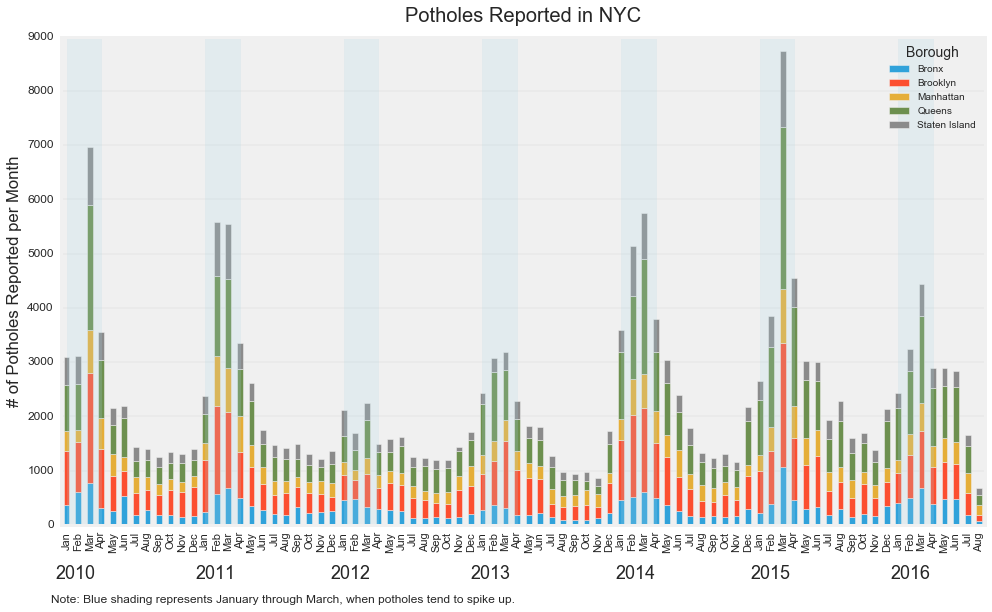

In [406]:
d = since_2010.groupby(by=[since_2010.index.year,since_2010.index.month,since_2010.Borough])['RptDate'].count().unstack()
ax = d.plot(kind='bar', figsize=(14,8), stacked=True)

# Organize some month data to work with x-axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
          'Sep', 'Oct', 'Nov', 'Dec']
month_nums = range(1,13)
month_dict = dict(zip(month_nums, months))
labels_month_nums = [month[1] for month in d.index]
labels_months = [month_dict[i] for i in labels_month_nums]

# Customize x-axis
ax.set_xticks(range(0,len(labels_months)))
ax.set_xticklabels(labels_months, rotation=90)

# Annotations
year_size = 18
plt.annotate('2010', (0,0), (-5, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2011', (0,0), (135, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2012', (0,0), (270, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2013', (0,0), (410, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2014', (0,0), (555, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2015', (0,0), (690, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2016', (0,0), (830, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

note = plt.annotate('Note: Blue shading represents January through March, when potholes tend to spike up.', (0,0), (-10, -70), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=12)



# Add shadings
a = 0.2
ax.axvspan(0, 3, alpha=a, color='lightblue')
ax.axvspan(12,15, alpha=a, color='lightblue')
ax.axvspan(24,27, alpha=a, color='lightblue')
ax.axvspan(36,39, alpha=a, color='lightblue')
ax.axvspan(48,51, alpha=a, color='lightblue')
ax.axvspan(60,63, alpha=a, color='lightblue')
ax.axvspan(72,75, alpha=a, color='lightblue')

# Customize gridlines
for line in ax.get_xgridlines():
    line.set_linewidth(.5)
for line in ax.get_ygridlines():
    line.set_linewidth(.3)
    
# Update font sizes
mpl.rcParams.update({'font.size': 14})
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=11)

# Title and axis labels
ax.set_ylabel('# of Potholes Reported per Month')
plt.title('Potholes Reported in NYC', y=1.02)
ax.xaxis.grid(False)

# Save figure
fig = ax.get_figure()
fig.savefig('potholes_reported_stacked.svg',bbox_extra_artists=(note,), bbox_inches='tight' );

In [407]:
# Size of NYC boroughs in square miles. Source = Google
borough_size = {'Bronx': 42.47, 'Brooklyn': 69.5, 'Manhattan': 22.82, 'Queens':108.1, 'Staten Island': 57.92}

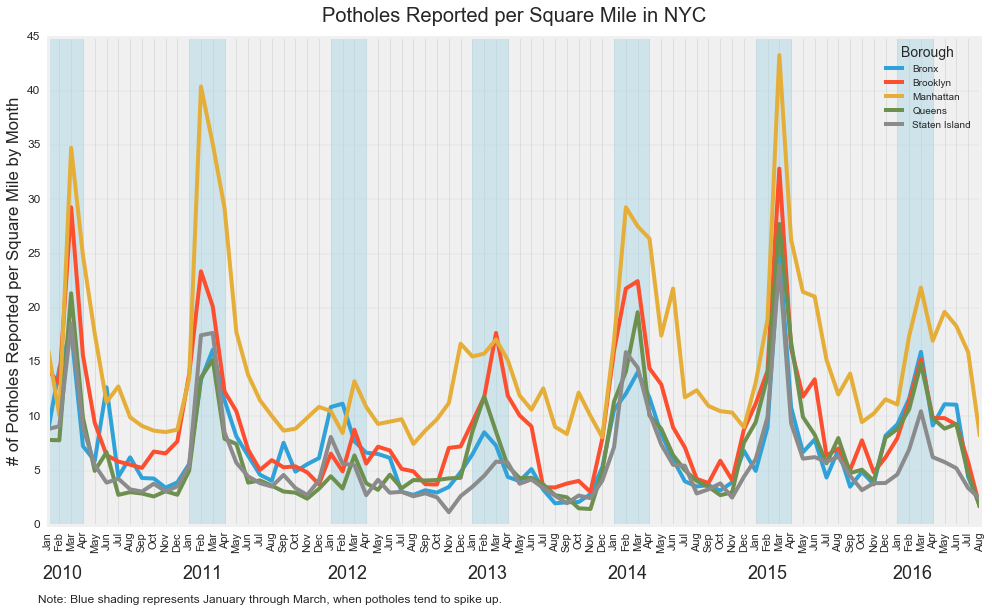

In [408]:
# Plot pot holes reported per square mile

d = since_2010.groupby(by=[since_2010.index.year,since_2010.index.month,since_2010.Borough])['RptDate'].count().unstack()
d = d.copy()
d.Bronx = d.Bronx / borough_size['Bronx']
d.Brooklyn = d.Brooklyn / borough_size['Brooklyn']
d.Manhattan = d.Manhattan / borough_size['Manhattan']
d.Queens = d.Queens / borough_size['Queens']
d['Staten Island'] = d['Staten Island'] / borough_size['Staten Island']

ax = d.plot(figsize=(14,8))

# Organize some month data to work with x-axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
          'Sep', 'Oct', 'Nov', 'Dec']
month_nums = range(1,13)
month_dict = dict(zip(month_nums, months))
labels_month_nums = [month[1] for month in d.index]
labels_months = [month_dict[i] for i in labels_month_nums]

# Customize x-axis
ax.set_xticks(range(0,len(labels_months)))
ax.set_xticklabels(labels_months, rotation=90)

# Annotations
year_size = 18
plt.annotate('2010', (0,0), (-5, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2011', (0,0), (135, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2012', (0,0), (280, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2013', (0,0), (420, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2014', (0,0), (560, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2015', (0,0), (700, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2016', (0,0), (845, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

note = plt.annotate('Note: Blue shading represents January through March, when potholes tend to spike up.', (0,0), (-10, -70), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=12)



# Add shadings
ax.axvspan(0, 3, alpha=0.5, color='lightblue')
ax.axvspan(12,15, alpha=0.5, color='lightblue')
ax.axvspan(24,27, alpha=0.5, color='lightblue')
ax.axvspan(36,39, alpha=0.5, color='lightblue')
ax.axvspan(48,51, alpha=0.5, color='lightblue')
ax.axvspan(60,63, alpha=0.5, color='lightblue')
ax.axvspan(72,75, alpha=0.5, color='lightblue')

# Customize gridlines
for line in ax.get_xgridlines():
    line.set_linewidth(.5)
for line in ax.get_ygridlines():
    line.set_linewidth(.3)
    
# Update font sizes
mpl.rcParams.update({'font.size': 14})
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=11)

# Title and axis labels
ax.set_ylabel('# of Potholes Reported per Square Mile by Month')
plt.title('Potholes Reported per Square Mile in NYC', y=1.02)

# Save figure
fig = ax.get_figure()
#fig.savefig('potholes_reported_persqmile.svg',bbox_extra_artists=(note,), bbox_inches='tight' );

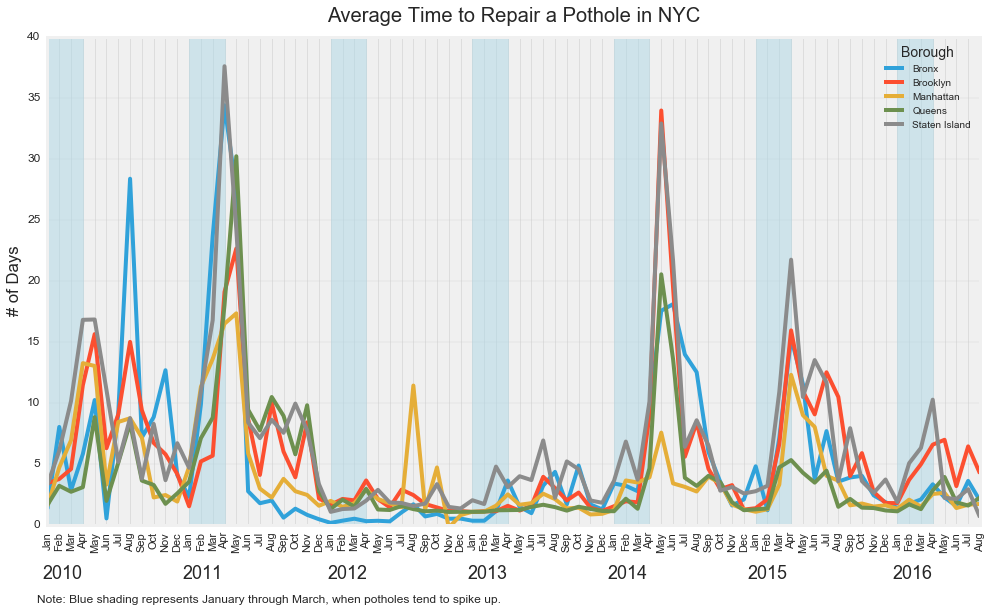

In [409]:
times = since_2010.groupby(by=[since_2010.index.year,since_2010.index.month,since_2010.Borough])['RepairTime'].sum().unstack()
counts = since_2010.groupby(by=[since_2010.index.year,since_2010.index.month,since_2010.Borough])['RepairTime'].count().unstack()
d = times / counts

ax = d.plot(figsize=(14,8))

# Organize some month data to work with x-axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
          'Sep', 'Oct', 'Nov', 'Dec']
month_nums = range(1,13)
month_dict = dict(zip(month_nums, months))
labels_month_nums = [month[1] for month in d.index]
labels_months = [month_dict[i] for i in labels_month_nums]

# Customize x-axis
ax.set_xticks(range(0,len(labels_months)))
ax.set_xticklabels(labels_months, rotation=90)

# Annotations
year_size = 18
plt.annotate('2010', (0,0), (-5, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2011', (0,0), (135, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2012', (0,0), (280, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2013', (0,0), (420, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2014', (0,0), (560, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2015', (0,0), (700, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

plt.annotate('2016', (0,0), (845, -40), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=year_size)

note = plt.annotate('Note: Blue shading represents January through March, when potholes tend to spike up.', (0,0), (-10, -70), xycoords='axes fraction', textcoords='offset points', va='top',\
            fontsize=12)



# Add shadings
ax.axvspan(0, 3, alpha=0.5, color='lightblue')
ax.axvspan(12,15, alpha=0.5, color='lightblue')
ax.axvspan(24,27, alpha=0.5, color='lightblue')
ax.axvspan(36,39, alpha=0.5, color='lightblue')
ax.axvspan(48,51, alpha=0.5, color='lightblue')
ax.axvspan(60,63, alpha=0.5, color='lightblue')
ax.axvspan(72,75, alpha=0.5, color='lightblue')

# Customize gridlines
for line in ax.get_xgridlines():
    line.set_linewidth(.5)
for line in ax.get_ygridlines():
    line.set_linewidth(.3)
    
# Update font sizes
mpl.rcParams.update({'font.size': 14})
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=11)

# Title and axis labels
ax.set_ylabel('# of Days')
plt.title('Average Time to Repair a Pothole in NYC', y=1.02)
plt.ylim(0,)


# Save figure
fig = ax.get_figure()

fig.savefig('potholes_reported_avgtimes.svg',bbox_extra_artists=(note,), bbox_inches='tight' );